In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
salary = ( 11,40,45,68,65,68,78,90,57,74,91,92,88,68,57,48,99)


In [2]:
# five point summary
#min, 25th, 50th, 75th, 100th


In [4]:
np.quantile(salary,[0,0.25,0.50,0.75,.1])

array([11., 57., 68., 88., 43.])

In [5]:
df = pd.DataFrame(salary, columns = ['salary'])

In [6]:
df

,salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [7]:
df.describe()

,salary
count,17.000000
mean,67.000000
std,22.751374
min,11.000000
25%,57.000000
50%,68.000000
75%,88.000000
max,99.000000


In [8]:
# to check outliers
# displot 
# boxplot


Text(0.5, 1.0, 'the box plot')

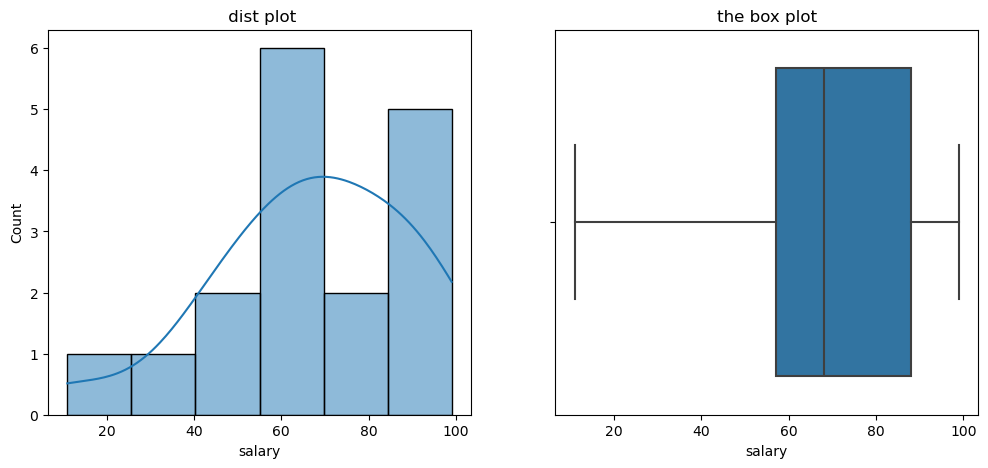

In [12]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary'], kde = True)
plt.title(" dist plot")


plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'salary')
plt.title("the box plot")


In [ ]:
#Outliers remedies
# 1. dropping the outliers
# 2. capping the outliers
# 3. replacement with mean and median

In [19]:
# dropping the outliers 
Q1 = df [ 'salary']. quantile(0.25)
Q3 = df [ 'salary']. quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [20]:
lower_fence

10.5

In [21]:
upper_fence

134.5

In [27]:
df_filtered = df[(df.salary >= lower_fence) & (df.salary <= upper_fence)]

In [29]:
df_filtered.shape

(17, 1)

Text(0.5, 1.0, 'the box plot')

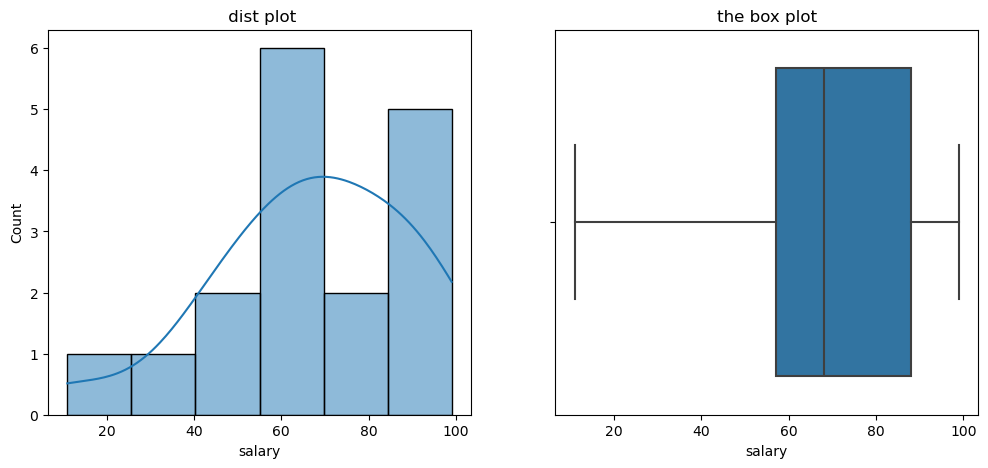

In [30]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['salary'], kde = True)
plt.title(" dist plot")


plt.subplot(1,2,2)
sns.boxplot(data = df_filtered, x = 'salary')
plt.title("the box plot")


In [33]:
# Imputation with mean and median 
df['salary_imputed_mean'] = np.where((df['salary'] > upper_fence) | (df['salary'] <= lower_fence), df['salary'].mean(), df['salary'])


In [34]:
df

,salary,salary_imputed_mean
0,11,11.0
1,40,40.0
2,45,45.0
3,68,68.0
4,65,65.0
5,68,68.0
6,78,78.0
7,90,90.0
8,57,57.0
9,74,74.0


Text(0.5, 1.0, 'the box plot of salary')

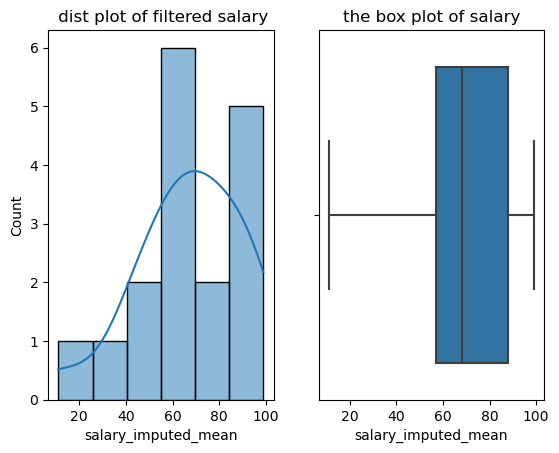

In [37]:
plt.subplot(1,2,1)
sns.histplot(df['salary_imputed_mean'], kde = True)
plt.title(" dist plot of filtered salary")


plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'salary_imputed_mean')
plt.title("the box plot of salary")

In [41]:
df['salary_imputed_median'] = np.where((df['salary'] > upper_fence) | (df['salary'] <= lower_fence), df['salary'].median(), df['salary'])


In [42]:
df

,salary,salary_imputed_mean,salary_imputed_median
0,11,11.0,11.0
1,40,40.0,40.0
2,45,45.0,45.0
3,68,68.0,68.0
4,65,65.0,65.0
5,68,68.0,68.0
6,78,78.0,78.0
7,90,90.0,90.0
8,57,57.0,57.0
9,74,74.0,74.0


Text(0.5, 1.0, 'the box plot of salary')

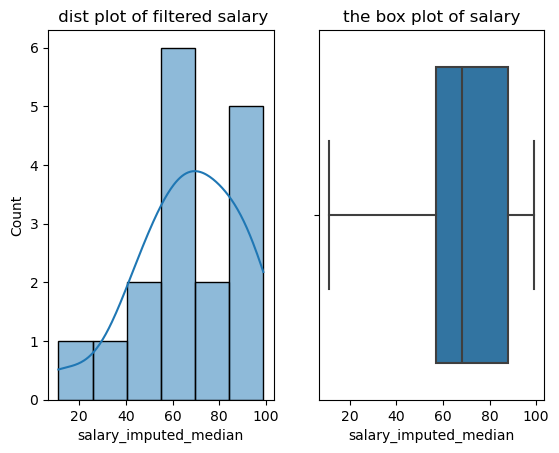

In [43]:
plt.subplot(1,2,1)
sns.histplot(df['salary_imputed_median'], kde = True)
plt.title(" dist plot of filtered salary")


plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'salary_imputed_median')
plt.title("the box plot of salary")

In [44]:
# Capping >> replacing with the nearest value which is not outlier 
df

,salary,salary_imputed_mean,salary_imputed_median
0,11,11.0,11.0
1,40,40.0,40.0
2,45,45.0,45.0
3,68,68.0,68.0
4,65,65.0,65.0
5,68,68.0,68.0
6,78,78.0,78.0
7,90,90.0,90.0
8,57,57.0,57.0
9,74,74.0,74.0


In [45]:
lower_cap = df['salary'].quantile(0.05) # lower cap ass 5th perceentile
upper_cap = df['salary'].quantile(0.95) # upper cap at 95th percentile

In [46]:
lower_cap

34.2

In [47]:
upper_cap

93.39999999999999

In [50]:
# replace outiers
df['salary_capped'] = np.where(df['salary'] < lower_cap, lower_cap,
         np.where (df['salary'] > upper_cap, upper_cap,
                  df['salary']))

In [51]:
df

,salary,salary_imputed_mean,salary_imputed_median,salary_capped
0,11,11.0,11.0,34.2
1,40,40.0,40.0,40.0
2,45,45.0,45.0,45.0
3,68,68.0,68.0,68.0
4,65,65.0,65.0,65.0
5,68,68.0,68.0,68.0
6,78,78.0,78.0,78.0
7,90,90.0,90.0,90.0
8,57,57.0,57.0,57.0
9,74,74.0,74.0,74.0


Text(0.5, 1.0, 'the box plot of capped salary')

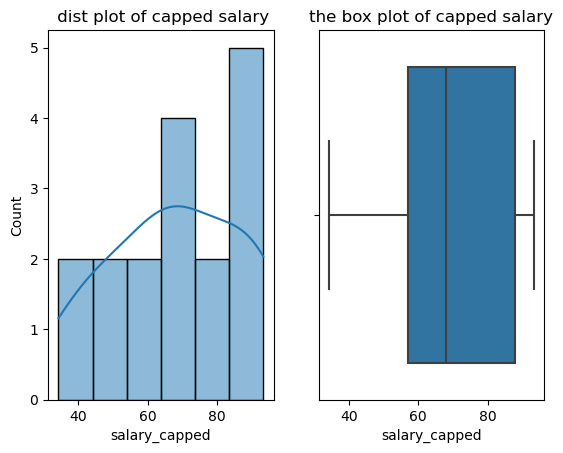

In [54]:
plt.subplot(1,2,1)
sns.histplot(df['salary_capped'], kde = True)
plt.title(" dist plot of capped salary")


plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'salary_capped')
plt.title("the box plot of capped salary")